# 패키지 임포트

In [1]:
from C110_01_collecting_functions import *

import numpy
import pandas
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
%matplotlib inline
plt.rcParams['font.size'] = 20
plt.rcParams["figure.figsize"] = (50, 10)
plt.rcParams['lines.linewidth'] = 5
plt.rcParams["axes.grid"] = True

In [3]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

# 한국은행 데이터 수집

In [4]:
list_item = [
    'K252', # 소비자심리지수
    'K269', # 경제심리지수
    'K404', # 수입물가지수
    'K403', # 수출물가지수
    'K205', # 서비스업생산지수
    'K206', # 소매판매액지수
]
df_ecos = pandas.DataFrame()
for item_code in list_item:
    df = get_ECOS_MM(item_code)
    line_logging(item_code, df.shape, 
    numpy.min(df['yyyymm']), numpy.max(df['yyyymm']))
    df_ecos = pandas.concat([df_ecos, df], sort=False)

df_ecos = df_ecos.sort_values(by=['item_code', 'yyyymm'], ascending=True)
display(df_ecos)

[2022/01/02 23:48:48]:[K252 (96, 3) 201401 202112]
[2022/01/02 23:48:51]:[K269 (96, 3) 201401 202112]
[2022/01/02 23:48:54]:[K404 (95, 3) 201401 202111]
[2022/01/02 23:48:58]:[K403 (95, 3) 201401 202111]
[2022/01/02 23:49:01]:[K205 (95, 3) 201401 202111]
[2022/01/02 23:49:04]:[K206 (95, 3) 201401 202111]


,yyyymm,item_code,value
94,201401,K205,93.7
93,201402,K205,91
92,201403,K205,97.8
91,201404,K205,95.5
90,201405,K205,97.3
...,...,...,...
4,202107,K404,120.05
3,202108,K404,121.61
2,202109,K404,124.4
1,202110,K404,130.92


<AxesSubplot:xlabel='datetime'>

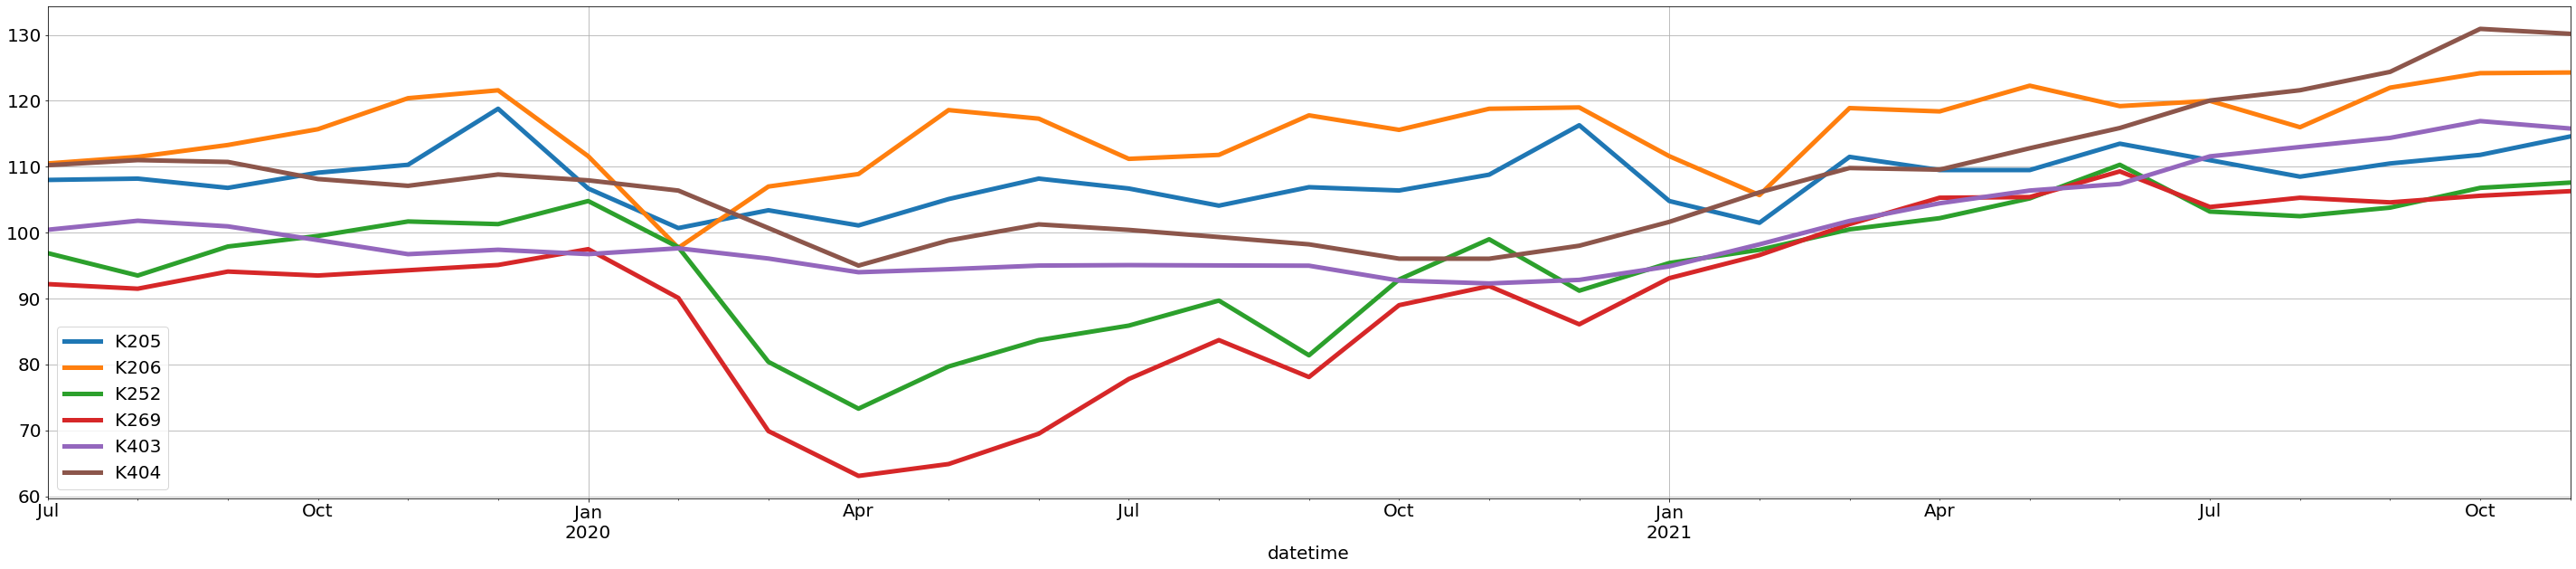

In [5]:
df_ecos['eod_date'] = df_ecos['yyyymm'].astype(str) + '01'
df_pivot = pandas.pivot_table(df_ecos, values='value', index=['eod_date'], columns=['item_code'], aggfunc=numpy.sum, fill_value=0).reset_index()
df_pivot['datetime'] = pandas.to_datetime(df_pivot['eod_date'], format='%Y%m%d')
df_pivot = df_pivot.set_index(['datetime'])
df_plot = pandas.DataFrame(df_pivot.index)
df_plot['K205'] = df_pivot['K205'].tolist()
df_plot['K206'] = df_pivot['K206'].tolist()
df_plot['K252'] = df_pivot['K252'].tolist()
df_plot['K269'] = df_pivot['K269'].tolist()
df_plot['K403'] = df_pivot['K403'].tolist()
df_plot['K404'] = df_pivot['K404'].tolist()
df_plot = df_plot.set_index(['datetime'])
df_plot = df_plot.astype(float)
df_plot = df_plot.tail(30).head(29)
# display(df_plot)
df_plot.plot()